data_train.shape: (30000, 785)
(30000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000,)
[0 8 1 ... 9 3 9]
(21000, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(9000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Iteration 0, Loss: 5.249254335717199
Iteration 100, Loss: 0.06117374216127106
Iteration 200, Loss: 0.029413016201858107
Iteration 300, Loss: 0.016758144362461123
Iteration 400, Loss: 0.010607938132671996
Iteration 500, Loss: 0.0073561698889974955
Iteration 600, Loss: 0.005476509550506684
Iteration 700, Loss: 0.00429007755789554
Iteration 800, Loss: 0.0034873054985528236
Iteration 900, Loss: 0.002915258806171216
Training Accuracy: 100.0%
Cross-Validation Accuracy: 98.377

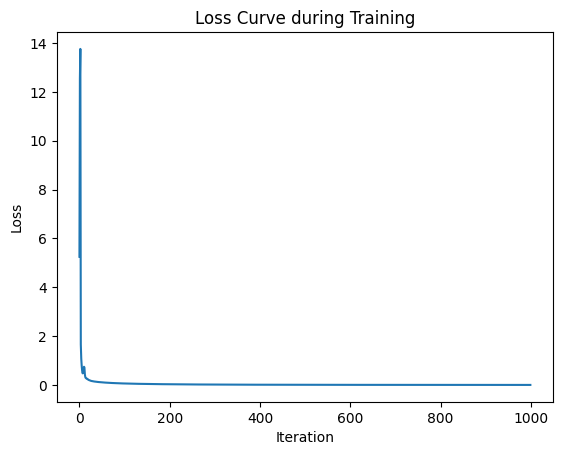

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading train data
df_train = pd.read_csv('Classification_train.csv')
arr_train = df_train.to_numpy()
print(f"data_train.shape: {arr_train.shape}")
df_train.describe()

## Forming Input and Output labels of training set
x_train = arr_train[:, 1:]
print(x_train.shape)
print(x_train)

y_train = arr_train[:, 0]
print(y_train.shape)
print(y_train)

x_t = x_train[:21000, :]
y_t = y_train[:21000]
y_logt = np.zeros((21000, 10))
for i in range(21000):
    y_logt[i, y_train[i]] = 1
print(y_logt.shape)
print(y_logt)

x_cv = x_train[21000:30000, :]
y_cv = y_train[21000:30000]
y_logcv = np.zeros((9000, 10))
for i in range(9000):
    y_logcv[i, y_train[21000 + i]] = 1
print(y_logcv.shape)
print(y_logcv)

class NNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def d_relu(self, x):
        return (x > 0).astype(int)  

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def forward_prop(self, x):
        
        #hidden layer
        self.z1 = np.matmul(x, self.w1) + self.b1
        self.a1 = self.relu(self.z1)
        
        #output layer
        self.z2 = np.matmul(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)
        
        return self.a2

    def backward_prop(self, x, y, alpha):
        m = x.shape[0]

        # Output Layer
        dz2 = self.a2 - y
        dw2 = np.matmul(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden Layer
        dz1 = np.matmul(dz2, self.w2.T) * self.d_relu(self.a1)
        dw1 = np.matmul(x.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Updating the hyperparameters
        self.w2 -= alpha * dw2
        self.b2 -= alpha * db2
        self.w1 -= alpha * dw1
        self.b1 -= alpha * db1

    def training(self, x, y, x_cv, y_logcv, iterations, alpha):
        losses = []

        for i in range(iterations):
            y_pred = self.forward_prop(x)
            loss = -np.sum(y * np.log(y_pred + 1e-15)) / x.shape[0]
            self.backward_prop(x, y, alpha)
            losses.append(loss)

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss}")
        accuracy_train = np.sum(np.argmax(y, axis=1) ==np.argmax(y_pred, axis=1)) / y.shape[0] * 100
        print(f"Training Accuracy: {accuracy_train}%")
        
        y_predcv = self.forward_prop(x_cv)
        #accuracy_cv = np.sum(np.argmax(y_logcv, axis=1) == np.argmax(y_predcv, axis=1)) / y_logcv.shape[0] * 100
        #print(f"Cross-Validation Accuracy: {accuracy_cv}%")
        return y_predcv

        #plt.plot(range(iterations), losses)
        #plt.title('Loss Curve during Training')
        #plt.xlabel('Iteration')
        #plt.ylabel('Loss')
        #plt.show()
        csv_file_path = 'NNN_Predicted.csv'
        np.savetxt(csv_file_path, y_predcv, delimiter=',')
        print(f"Array has been saved to {csv_file_path}")


input_size = 784
hidden_size = 512
output_size = 10

NN = NNN(input_size, hidden_size, output_size)
NN.training(x_t, y_logt, x_cv, y_logcv, 1000, 0.01)

In [3]:
## Reading test data
df_test=pd.read_csv('Classification_test.csv')
arr_test=df_test.to_numpy()
print(f"data_train.shape: {arr_test.shape}")
df_test.describe()

data_train.shape: (10000, 785)


,ID,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,10000.00000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.000000,...,10000.000000,10000.000000,10000.0000,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0,10000.0
mean,9945.83690,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.100800,...,0.018000,0.044300,0.0067,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std,5787.98325,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.007429,...,1.277748,3.153019,0.6700,0.0,0.0,0.0,0.0,0.0,0.0,0.0
min,1.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
25%,4895.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50%,9968.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
75%,14933.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,...,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0
max,19996.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,255.000000,...,98.000000,247.000000,67.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [4]:
## Forming Input and Output labels of test set
x_test=arr_test[:,1:]
print(x_test.shape)
print(x_test)

y_test=arr_test[:,0]
print(y_test.shape)
print(y_test)
y_logtest=np.zeros((10000,20000))
for i in range(10000):
    y_logtest[i,y_test[i]]=1
print(y_logtest.shape)    
print(y_logtest) 

(10000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(10000,)
[15795   860  5390 ...   634 10057 13345]
(10000, 20000)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Reading train data
df_train = pd.read_csv('Classification_train.csv')
arr_train = df_train.to_numpy()
print(f"data_train.shape: {arr_train.shape}")
df_train.describe()

## Forming Input and Output labels of training set
x_train = arr_train[:, 1:]
print(x_train.shape)
print(x_train)

y_train = arr_train[:, 0]
print(y_train.shape)
print(y_train)

x_t = x_train[:21000, :]
y_t = y_train[:21000]
y_logt = np.zeros((21000, 10))
for i in range(21000):
    y_logt[i, y_train[i]] = 1
print(y_logt.shape)
print(y_logt)

x_cv = x_train[21000:30000, :]
y_cv = y_train[21000:30000]
y_logcv = np.zeros((9000, 10))
for i in range(9000):
    y_logcv[i, y_train[21000 + i]] = 1
print(y_logcv.shape)
print(y_logcv)

class NNN:
    def __init__(self, input_size, hidden_size, output_size):
        self.w1 = np.random.randn(input_size, hidden_size) * 0.01
        self.b1 = np.zeros((1, hidden_size))
        self.w2 = np.random.randn(hidden_size, output_size) * 0.01
        self.b2 = np.zeros((1, output_size))

    def relu(self, x):
        return np.maximum(0, x)

    def d_relu(self, x):
        return (x > 0).astype(int)  

    def softmax(self, x):
        e_x = np.exp(x - np.max(x, axis=1, keepdims=True))
        return e_x / np.sum(e_x, axis=1, keepdims=True)

    def forward_prop(self, x):
        
        #hidden layer
        self.z1 = np.matmul(x, self.w1) + self.b1
        self.a1 = self.relu(self.z1)
        
        #output layer
        self.z2 = np.matmul(self.a1, self.w2) + self.b2
        self.a2 = self.softmax(self.z2)
        
        return self.a2

    def backward_prop(self, x, y, alpha):
        m = x.shape[0]

        # Output Layer
        dz2 = self.a2 - y
        dw2 = np.matmul(self.a1.T, dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) / m

        # Hidden Layer
        dz1 = np.matmul(dz2, self.w2.T) * self.d_relu(self.a1)
        dw1 = np.matmul(x.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m

        # Updating the hyperparameters
        self.w2 -= alpha * dw2
        self.b2 -= alpha * db2
        self.w1 -= alpha * dw1
        self.b1 -= alpha * db1

    def training(self, x, y, x_cv, y_logcv, iterations, alpha):
        losses = []

        for i in range(iterations):
            y_pred = self.forward_prop(x)
            loss = -np.sum(y * np.log(y_pred + 1e-15)) / x.shape[0]
            self.backward_prop(x, y, alpha)
            losses.append(loss)

            if i % 100 == 0:
                print(f"Iteration {i}, Loss: {loss}")
        accuracy_train = np.sum(np.argmax(y, axis=1) ==np.argmax(y_pred, axis=1)) / y.shape[0] * 100
        print(f"Training Accuracy: {accuracy_train}%")
        
        y_predtest = self.forward_prop(x_cv)
        csv_file_path = 'NNN_Predicted.csv'
        np.savetxt(csv_file_path, y_predtest, delimiter=',')
        print(f"Array has been saved to {csv_file_path}")


input_size = 784
hidden_size = 512
output_size = 10

NN = NNN(input_size, hidden_size, output_size)
NN.training(x_t, y_logt, x_test, y_logtest, 1000, 0.01)

data_train.shape: (30000, 785)
(30000, 784)
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
(30000,)
[0 8 1 ... 9 3 9]
(21000, 10)
[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [1. 0. 0. ... 0. 0. 0.]]
(9000, 10)
[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 1. 0.]
 [0. 0. 0. ... 0. 0. 1.]
 ...
 [0. 0. 0. ... 0. 0. 1.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 1.]]
Iteration 0, Loss: 4.518352436609307
Iteration 100, Loss: 0.05537687996097224
Iteration 200, Loss: 0.02605934160038641
Iteration 300, Loss: 0.014816471170912577
Iteration 400, Loss: 0.009475150335271703
Iteration 500, Loss: 0.006612700931186982
Iteration 600, Loss: 0.004949545547688755
Iteration 700, Loss: 0.003896615187554126
Iteration 800, Loss: 0.003180631672116601
Iteration 900, Loss: 0.0026686785753241124
Training Accuracy: 100.0%
Array has been saved to NNN_Predic